### Pair Programming  A/B TESTING

In [51]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [52]:
# VAMOS A VER ALGUNOS MÉTODOS DE VISUALIZACIÓN QUE NO CONOCIAMOS:

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [53]:
data = pd.read_csv("files/marketing_AB.csv", index_col = 0)

**Ejercicio 1**

Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

In [54]:
data.head(5)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [58]:
print(f'Este data frame está compuesto por {data.shape[0]} filas y {data.shape[1]}')

print("----------------------")

print(f'El dataframe tiene {data.duplicated().sum()} duplicados')

print("----------------------")

print(f'los nulos de este dataframe son: \n {data.isna().sum()}')

print("----------------------")

print(f'el tipo de datos de nuestro dataframe es: \n {data.dtypes}')

print("----------------------")

print(f'los datos únicos de la columna test_group son: {data["test group"].unique()}')

Este data frame está compuesto por 588101 filas y 6
----------------------
El dataframe tiene 0 duplicados
----------------------
los nulos de este dataframe son: 
 user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
----------------------
el tipo de datos de nuestro dataframe es: 
 user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object
----------------------
los datos únicos de la columna test_group son: ['ad' 'psa']


- Hipotesis

    - Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

    - Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

In [59]:
cross_tab = pd.crosstab(data["test group"],data["converted"])

cross_tab

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [60]:
row_totals = cross_tab.sum(axis=1)
col_totals = cross_tab.sum(axis=0)

percentages = np.round(cross_tab.div(row_totals, axis=0) * 100,2)

percentages

converted,False,True
test group,,
ad,97.45,2.55
psa,98.21,1.79


In [61]:
chi2, p_value, _, _ = chi2_contingency(cross_tab)

alpha = 0.05



if p_value < alpha:
    print("Acpetamos H1")
else:
    print("Aceptamos H0")

Acpetamos H1


- **Interpretación**

Del total de los datos la tasa de conversión para el grupo AD fue del 2.55% frente al 1.79% del grupo PSA.

Por otro lado, podemos decir que hay una diferencia significativa en la tasa de conversión entre los grupos AD y PSA por tanto, los resultados sugieren que deberían sustituir el antiguo anuncio por el nuevo

**Ejercicio 2**

Preparación de los datos: Asegúrate de que los datos estén limpios y listos para el análisis. Esto incluye la eliminación de datos faltantes y la verificación de la coherencia de los datos.

Hipótesis: Plantea una hipótesis nula (H0) y una hipótesis alternativa (H1) para el experimento. En este caso, las deberéis plantear vosotras

Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student, para comparar la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa". Esto te permitirá determinar si hay una diferencia significativa entre los dos grupos.

Análisis de resultados:

- Si el valor p (p-value) es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.

- Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

Conclusiones y recomendaciones: Basándote en los resultados de la prueba de hipótesis, llega a una conclusión sobre si el tipo de anuncio (ad o psa) tiene un impacto significativo en la cantidad promedio de anuncios vistos por usuario. Si es así, puedes hacer recomendaciones basadas en estos hallazgos.

In [ ]:
data.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [ ]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


- H0: No hay diferencia significativa en la cantidad promedio de anuncios vistos por los usuarios entre los grupos "ad" y "psa".
- H1: Existe una diferencia significativa en la cantidad promedio de anuncios vistos por los usuarios entre los grupos "ad" y "psa".

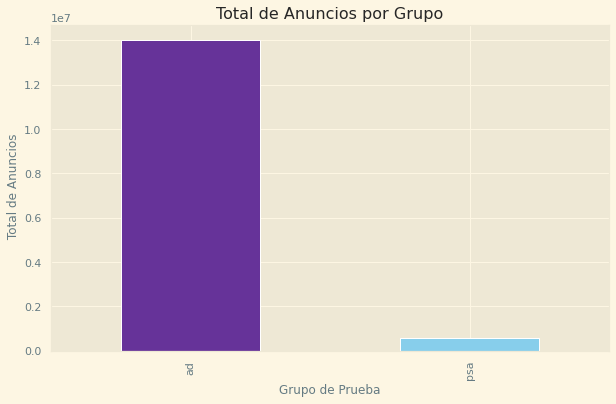

In [ ]:
# Crear los subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular la suma del total de anuncios por grupo
grouped_data = data.groupby('test_group')['total_ads'].sum()

# Crear el gráfico de barras
grouped_data.plot(kind='bar', ax=ax, color=['rebeccapurple', 'skyblue'])

# Añadir etiquetas y título
ax.set_ylabel(' Total de Anuncios')
ax.set_xlabel('Grupo de Prueba')
ax.set_title( 'Total de Anuncios por Grupo');


In [ ]:
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")


In [ ]:
normalidad(data,"total_ads")

Para la columna total_ads los datos no siguen una distribución normal.


In [ ]:
def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "test_group"):

    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    
    # iteramos por las columnas de las metricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        
        # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]
        
        # aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes.")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales.")
            
    

## llamamos a la función
test_man_whitney(data, ["total_ads"], "ad", "psa")

Para la métrica total_ads, las medianas son diferentes.


- **Interpretación**

No podemos aceptar la hipótesis cero por tanto, concluimos que existe una diferencia significativa en la cantidad promedio de anuncios vistos por los usuarios entre los grupos "ad" y "psa".